<h1>Prediction COVID-19 Contaction Based on Political Affiliation (and other factors)</h1>
<p>description</p>

<h3>Import dependencies</h3>
<ul>
    <li>pandas - data analysis and visualization</li>
    <li>cleaner - local data-cleaning package for running sql sanitizing
</ul>

In [48]:
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np

import sys
sys.path.insert(0, './cleaner')
import cleaner

from matplotlib import pyplot
%matplotlib inline

ROW_LIMIT = 25

<h2>Analysing Original Data</h2>
<p>description</p>

<h3>COVID-19 cases per county in the U.S.</h3>
<p>description</p>

In [14]:
original_cases = pd.read_csv(cleaner.DIRTY_CASES)
original_cases.head(ROW_LIMIT)

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0
5,2020-01-25,Orange,California,6059.0,1,0
6,2020-01-25,Cook,Illinois,17031.0,1,0
7,2020-01-25,Snohomish,Washington,53061.0,1,0
8,2020-01-26,Maricopa,Arizona,4013.0,1,0
9,2020-01-26,Los Angeles,California,6037.0,1,0


<h3>Political party affiliation by per county in the U.S.</h3>
<p>description</p>

In [15]:
original_party = pd.read_csv(cleaner.DIRTY_PARTY)
original_party.head(25)

,year,state,state_po,county,FIPS,office,candidate,party,candidatevotes,totalvotes,version
0,2000,Alabama,AL,Autauga,1001.0,President,Al Gore,democrat,4942.0,17208,20191203
1,2000,Alabama,AL,Autauga,1001.0,President,George W. Bush,republican,11993.0,17208,20191203
2,2000,Alabama,AL,Autauga,1001.0,President,Ralph Nader,green,160.0,17208,20191203
3,2000,Alabama,AL,Autauga,1001.0,President,Other,NaN,113.0,17208,20191203
4,2000,Alabama,AL,Baldwin,1003.0,President,Al Gore,democrat,13997.0,56480,20191203
5,2000,Alabama,AL,Baldwin,1003.0,President,George W. Bush,republican,40872.0,56480,20191203
6,2000,Alabama,AL,Baldwin,1003.0,President,Ralph Nader,green,1033.0,56480,20191203
7,2000,Alabama,AL,Baldwin,1003.0,President,Other,NaN,578.0,56480,20191203
8,2000,Alabama,AL,Barbour,1005.0,President,Al Gore,democrat,5188.0,10395,20191203
9,2000,Alabama,AL,Barbour,1005.0,President,George W. Bush,republican,5096.0,10395,20191203


<h3>Population Demographics per county in the U.S.</h3>
<p>description</p>

In [16]:
original_dems = pd.read_csv(cleaner.DIRTY_DEMS)
original_dems.head(25)

,SUMLEV,STATE,COUNTY,STNAME,CTYNAME,YEAR,AGEGRP,TOT_POP,TOT_MALE,TOT_FEMALE,...,HWAC_MALE,HWAC_FEMALE,HBAC_MALE,HBAC_FEMALE,HIAC_MALE,HIAC_FEMALE,HAAC_MALE,HAAC_FEMALE,HNAC_MALE,HNAC_FEMALE
0,50,1,1,Alabama,Autauga County,1,0,54571,26569,28002,...,607,538,57,48,26,32,9,11,19,10
1,50,1,1,Alabama,Autauga County,1,1,3579,1866,1713,...,77,56,9,5,4,1,0,0,2,1
2,50,1,1,Alabama,Autauga County,1,2,3991,2001,1990,...,64,66,2,3,2,7,2,3,2,0
3,50,1,1,Alabama,Autauga County,1,3,4290,2171,2119,...,51,57,13,7,5,5,2,1,1,1
4,50,1,1,Alabama,Autauga County,1,4,4290,2213,2077,...,48,44,7,5,0,2,2,1,3,1
5,50,1,1,Alabama,Autauga County,1,5,3080,1539,1541,...,62,34,2,4,2,3,0,1,1,1
6,50,1,1,Alabama,Autauga County,1,6,3157,1543,1614,...,54,39,5,3,0,0,2,0,5,2
7,50,1,1,Alabama,Autauga County,1,7,3330,1594,1736,...,56,53,4,6,0,2,0,1,2,1
8,50,1,1,Alabama,Autauga County,1,8,4157,2004,2153,...,50,37,2,4,4,2,0,2,1,2
9,50,1,1,Alabama,Autauga County,1,9,4086,1974,2112,...,47,34,3,1,2,3,0,0,1,1


<h2>Cleaning Data</h2>
<p>description</p>

<h3>Cleaning COVID-19 cases</h3>
<p>description</p>

In [17]:
cleaner.clean_cases()
cleaned_cases = pd.read_csv(cleaner.CLEANED_CASES_SRC)
cleaned_cases.head(ROW_LIMIT)

,fips,state,county,cases
0,1001,Alabama,Autauga,2173
1,1003,Alabama,Baldwin,6966
2,1005,Alabama,Barbour,1061
3,1011,Alabama,Bullock,655
4,1015,Alabama,Calhoun,4892
5,1021,Alabama,Chilton,1946
6,1029,Alabama,Cleburne,590
7,1033,Alabama,Colbert,2307
8,1035,Alabama,Conecuh,577
9,1037,Alabama,Coosa,223


<h3>Cleaning political party affiliations</h3>
<p>description</p>

In [18]:
cleaner.clean_party()
cleaned_party = pd.read_csv(cleaner.CLEANED_PARTY_SRC)
cleaned_party.head(ROW_LIMIT)

,fips,state,county,political_affiliation
0,1001,Alabama,Autauga,republican
1,1003,Alabama,Baldwin,republican
2,1005,Alabama,Barbour,republican
3,1007,Alabama,Bibb,republican
4,1009,Alabama,Blount,republican
5,1011,Alabama,Bullock,democrat
6,1013,Alabama,Butler,republican
7,1015,Alabama,Calhoun,republican
8,1017,Alabama,Chambers,republican
9,1019,Alabama,Cherokee,republican


<h3>Cleaning demographics</h3>
<p>description</p>

In [19]:
cleaner.clean_dems()
cleaned_dems= pd.read_csv(cleaner.CLEANED_DEMS_SRC)
cleaned_dems.head(ROW_LIMIT)

,fips,state,county,male,female,white_male,white_female,black_male,black_female,hispanic_male,hispanic_female,asian_male,asian_female
0,1001,Alabama,Autauga County,8744,9004,6588,6650,1832,2037,323,258,133,148
1,1003,Alabama,Baldwin County,29564,30286,25096,25746,3427,3347,1915,1599,342,496
2,1005,Alabama,Barbour County,5098,3339,2261,1455,2697,1810,309,159,22,18
3,1007,Alabama,Bibb County,4545,3232,2896,2566,1586,622,175,103,9,3
4,1009,Alabama,Blount County,8606,8544,8277,8230,178,112,1121,888,19,28
5,1011,Alabama,Bullock County,2166,1408,635,271,1462,1077,204,162,4,5
6,1013,Alabama,Butler County,2702,3200,1346,1402,1244,1709,46,36,87,59
7,1015,Alabama,Calhoun County,17806,18606,13289,13376,3968,4586,897,721,163,247
8,1017,Alabama,Chambers County,4903,5162,2655,2656,2043,2367,161,106,128,77
9,1019,Alabama,Cherokee County,3420,3385,3170,3192,173,121,76,57,7,8


<h3>Joining cleaned data</h3>
<p>description</p>

In [4]:
# TODO: move new sql script
#cleaner.finalize()

cleaned_data = pd.read_csv(cleaner.FINAL_SRC)
cleaned_data.head(ROW_LIMIT)

,FIPS,state,county,population,male,female,white_male,white_female,black_male,black_female,hispanic_male,hispanic_female,asian_male,asian_female,republican_ratio,democrat_ratio,political_affiliation,cases,percent_risk,risk_classification
0,10003,Delaware,New Castle County,185145,92032,93113,58897,57834,23567,25814,11108,10325,6982,6769,0.38,0.62,democrat,13259,7.0,0
1,10005,Delaware,Sussex County,54497,27294,27203,21303,20961,4423,4517,3983,3330,459,587,0.63,0.37,republican,8170,15.0,0
2,1001,Alabama,Autauga County,17748,8744,9004,6588,6650,1832,2037,323,258,133,148,0.76,0.24,republican,2173,12.0,0
3,1003,Alabama,Baldwin County,59850,29564,30286,25096,25746,3427,3347,1915,1599,342,496,0.81,0.19,republican,6966,12.0,0
4,1005,Alabama,Barbour County,8437,5098,3339,2261,1455,2697,1810,309,159,22,18,0.53,0.47,republican,1061,13.0,0
5,1011,Alabama,Bullock County,3574,2166,1408,635,271,1462,1077,204,162,4,5,0.25,0.75,democrat,655,18.0,1
6,1015,Alabama,Calhoun County,36412,17806,18606,13289,13376,3968,4586,897,721,163,247,0.72,0.28,republican,4892,13.0,0
7,1021,Alabama,Chilton County,13618,6779,6839,5855,5866,746,813,761,556,44,50,0.84,0.16,republican,1946,14.0,0
8,1029,Alabama,Cleburne County,4249,2145,2104,2047,2005,62,67,74,44,2,4,0.90,0.10,republican,590,14.0,0
9,1033,Alabama,Colbert County,16125,7971,8154,6422,6435,1324,1464,324,203,41,64,0.71,0.29,republican,2307,14.0,0


<h2>Visualizing Data</h2>
<p>description</p>

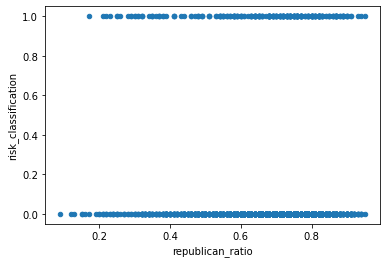

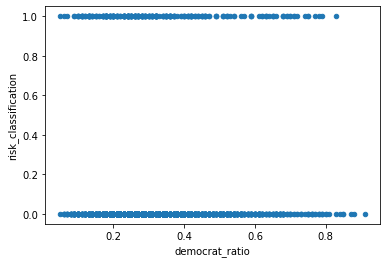

In [49]:
x_reps = 'republican_ratio'
x_dems = 'democrat_ratio'
y = 'risk_classification'
cleaned_data[[x_reps,y]].plot(x=x_reps,y=y,kind='scatter')
cleaned_data[[x_dems,y]].plot(x=x_dems,y=y,kind='scatter')

<p>feeding half of data to learn from...</p>

In [151]:
ROW_COUNT = cleaned_data.shape[0]
HALF_DATA = round(ROW_COUNT / 2)

In [152]:
X_first_half = cleaned_data[['FIPS','population','cases']][:HALF_DATA].to_numpy()
y_first_half = cleaned_data['risk_classification'][:HALF_DATA].to_numpy()
clf = LogisticRegression(random_state=0, max_iter=2000).fit(X_first_half, y_first_half)

In [153]:
clf.predict(X_first_half)

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,

In [154]:
clf.score(X_first_half,y_first_half)

1.0

<p>testing predictions on other half of unseen data...</p>

In [163]:
X_second_half = cleaned_data[['FIPS','population','cases']][HALF_DATA:].to_numpy()
y_second_half = cleaned_data['risk_classification'][HALF_DATA:].to_numpy()

In [165]:
clf.predict(X_second_half)

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,

In [166]:
clf.score(X_second_half, y_second_half)

1.0